In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import random
from sklearn import metrics
import seaborn as sea
import pickle

# -------------------- PARAMETERS --------------------

In [2]:
# name of the file with dataset
filename = 'mtg_dataset_02_2023'

In [3]:
# importing dataset from the .cvs file with chosen name
df = pd.read_csv('Datasets\\' + filename + '.csv', sep=';')

In [4]:
# name of the folder where trained models are imported from
import_folder = 'Models\\'

In [5]:
# which columns are treated as numeric
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [6]:
# columns to exclude
columns_to_exclude = ['name','set']
price_excludes = ['price']

In [7]:
# paramenters of random number generator
random_state = 0
random.seed(random_state)

# --------------------------- DATA ---------------------------

In [8]:
# dataset preview
df.head()

,name,set,dfc,prints,layout,flavor_text,type_creature,type_artifact,type_enchantment,type_planeswalker,...,custom_cheatinto_play,custom_ritual,custom_no_maximum,custom_wheel,custom_extra_combat,custom_pillow_fort,custom_land_destruction,custom_win_game,custom_lose_game,custom_poison
0,Fury Sliver,tsp,0.0,3,normal,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kor Outfitter,zen,0.0,2,normal,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Siren Lookout,xln,0.0,1,normal,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Venerable Knight,eld,0.0,1,normal,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Wildcall,ugin,0.0,2,normal,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
file = open(import_folder + 'price_cheap', 'rb')
model_price_cheap = pickle.load(file)
file.close()

In [10]:
file = open(import_folder + 'price_moderate', 'rb')
model_price_moderate = pickle.load(file)
file.close()

In [11]:
file = open(import_folder + 'price_expensive', 'rb')
model_price_expensive = pickle.load(file)
file.close()

# -------------------- FUNCTIONS --------------------

In [12]:
# function to exclude unwanted columns
def prepare_for_model(data, decision_class, numeric_only, columns_excludes):
    y = data[decision_class]
    x = data.loc[:, ~data.columns.isin(columns_to_exclude)]
    
    for exclude in columns_excludes:
        x = x.loc[:, ~x.columns.str.contains(exclude)]
        
    if numeric_only == True:
        x = x.select_dtypes(include=numerics)
        
    if decision_class not in x:
        x[decision_class] = y
    
    return x

# -------------------- CARD PREDICTION --------------------

In [13]:
card_name = 'Damnation'

In [14]:
card_sample = df.loc[df['name'] == card_name].sample(n=1, random_state=0)
card_sample

,name,set,dfc,prints,layout,flavor_text,type_creature,type_artifact,type_enchantment,type_planeswalker,...,custom_cheatinto_play,custom_ritual,custom_no_maximum,custom_wheel,custom_extra_combat,custom_pillow_fort,custom_land_destruction,custom_win_game,custom_lose_game,custom_poison
31333,Damnation,2x2,0.0,7,normal,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print("Card predictions for:")
print(card_sample['name'].values.tolist())
print('')

df_results = pd.DataFrame(columns=['price_range', 'NO', 'YES'])

x = prepare_for_model(card_sample, 'price_cheap', True, price_excludes)
prediction_cheap = model_price_cheap.predict_proba(x.loc[:, ~x.columns.isin(['price_cheap'])])
row_cheap = {'price_range':'cheap', 'NO':prediction_cheap[0][0], 'YES':prediction_cheap[0][1]}
df_results = df_results.append(row_cheap, ignore_index=True)

x = prepare_for_model(card_sample, 'price_moderate', True, price_excludes)
prediction_moderate = model_price_moderate.predict_proba(x.loc[:, ~x.columns.isin(['price_moderate'])])
row_moderate = {'price_range':'moderate', 'NO':prediction_moderate[0][0], 'YES':prediction_moderate[0][1]}
df_results = df_results.append(row_moderate, ignore_index=True)

x = prepare_for_model(card_sample, 'price_expensive', True, price_excludes)
prediction_expensive = model_price_expensive.predict_proba(x.loc[:, ~x.columns.isin(['price_expensive'])])
row_expensive = {'price_range':'expensive', 'NO':prediction_expensive[0][0], 'YES':prediction_expensive[0][1]}
df_results = df_results.append(row_expensive, ignore_index=True)

Card predictions for:
['Damnation']



In [16]:
df_results

,price_range,NO,YES
0,cheap,0.903721,0.096279
1,moderate,0.420201,0.579799
2,expensive,0.182769,0.817231


<AxesSubplot:xlabel='price_range', ylabel='YES'>

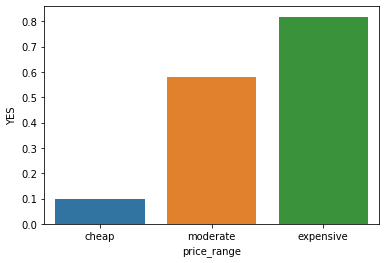

In [17]:
sea.barplot(data=df_results, x="price_range", y="YES")